<h4>Libs and housekeeping</h4>

In [2]:
import os
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import time
import statsmodels.api as sm

from statsmodels.tsa.stattools     import pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rnd = np.random.RandomState(RANDOM_STATE)
NOISE = 0.1
TEST_SIZE = 0.2
ALPHA = 0.001
N_SAMPLES = 1000


In [4]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1,
          'scatter.edgecolors': 'b' 
         }

CMAP = plt.cm.brg
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid')

<Figure size 1500x700 with 0 Axes>

<h4>get some data tooo</h4>

In [6]:
csvName = 'a10.csv'
data_df = pd.read_csv('a10.csv')
data_df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


<h4>EDA on the data</h4>

In [8]:
data_df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


In [9]:
data_df.isnull().sum()

date     0
value    0
dtype: int64

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [11]:
data_df['date'] = pd.to_datetime(data_df['date'])

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [13]:
data_df['date'].dt.year.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [25]:
data_df['date'].dt.year.nunique()

18

<Axes: xlabel='date', ylabel='value'>

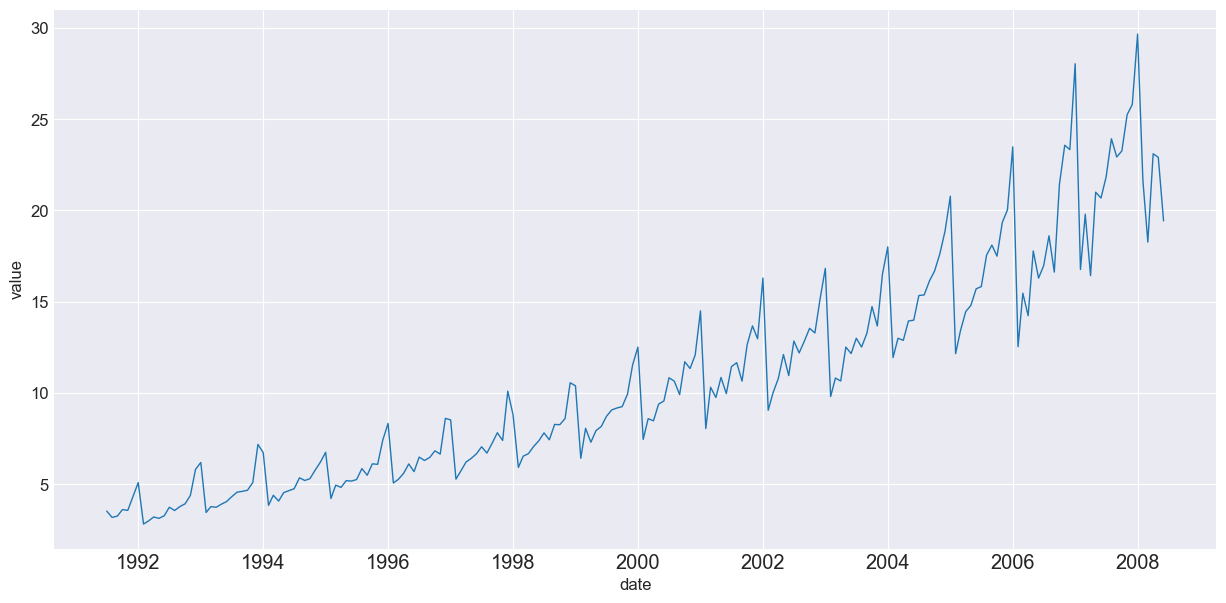

In [29]:
# line plot
sns.lineplot(data = data_df, x = 'date', y = 'value')

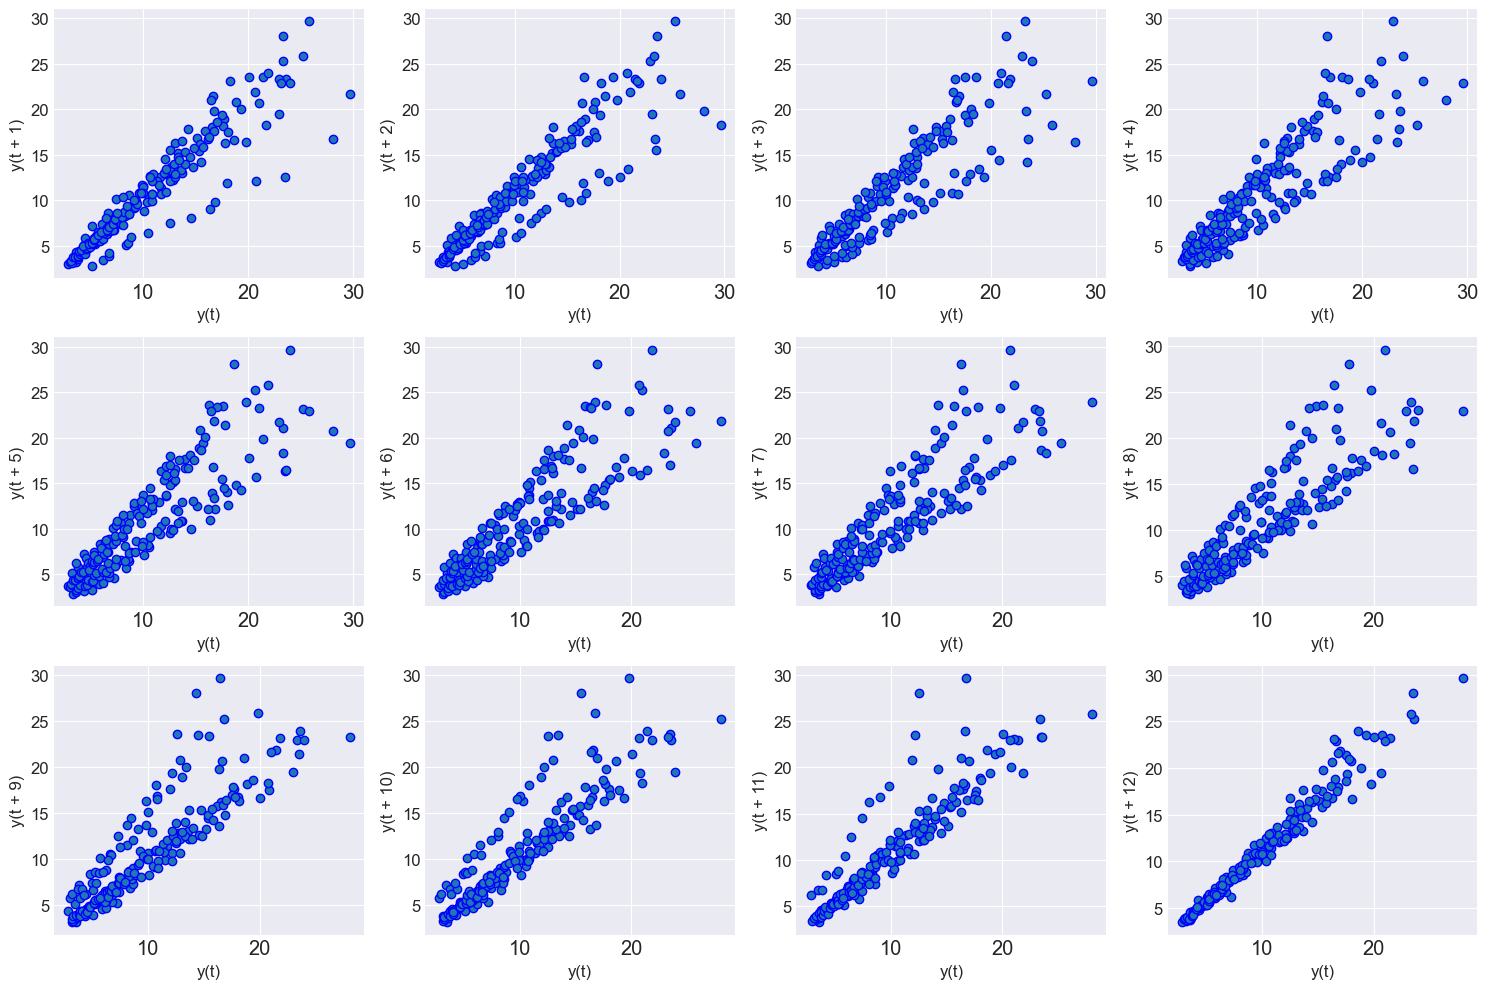

In [37]:
fig ,axes = plt.subplots(3,4,  figsize =  (15,10))

for count , ax in enumerate(axes.ravel()):
    pd.plotting.lag_plot(data_df['value'], lag=count+1, ax= ax)

plt.tight_layout()


In [50]:
lag = np.arange(1,15)
data_acf = []

for l in lag:
    data_acf.append(data_df['value'].autocorr(l))

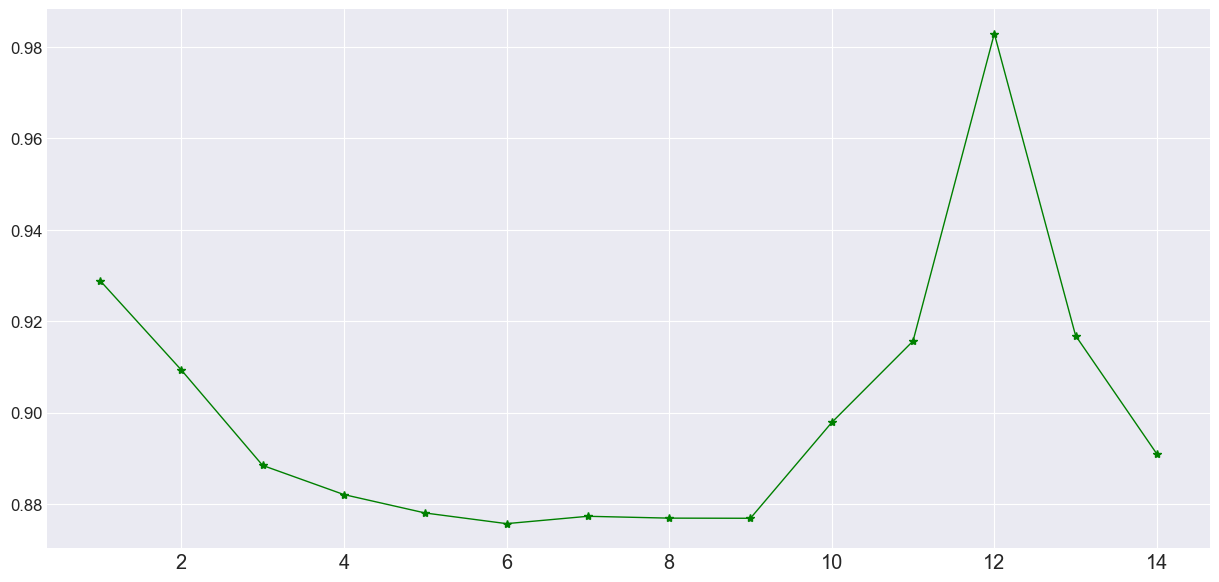

In [120]:
fig,ax = plt.subplots()
ax.plot(lag, data_acf, marker = '*', color = 'g')

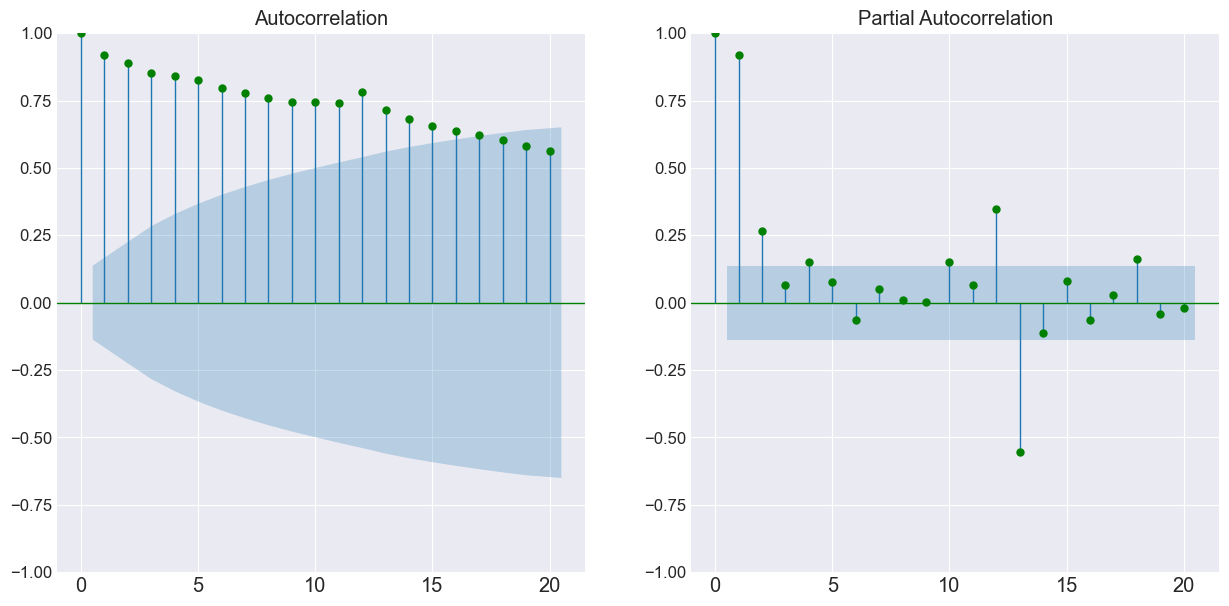

In [63]:
fig,axes = plt.subplots(1,2)
_=plot_acf(data_df['value'], lags = 20, color = 'g', ax = axes[0])
_=plot_pacf(data_df['value'], lags = 20, color = 'g', ax = axes[1])

In [113]:
def get_trend(timeseries, deg = 10):

    x     = list(range(len(timeseries)))
    y     = timeseries.values
    coef  = np.polyfit(x, y, deg)
    trend = np.poly1d(coef)(x)

    return pd.Series(data = trend, index = timeseries.index)

In [115]:
data_df['Trend'] = get_trend(data_df['value'])
data_df.head()

,date,value,Trend
0,1991-07-01,3.526591,3.083166
1,1991-08-01,3.180891,3.307196
2,1991-09-01,3.252221,3.474131
3,1991-10-01,3.611003,3.595332
4,1991-11-01,3.565869,3.680613


<Axes: xlabel='date', ylabel='value'>

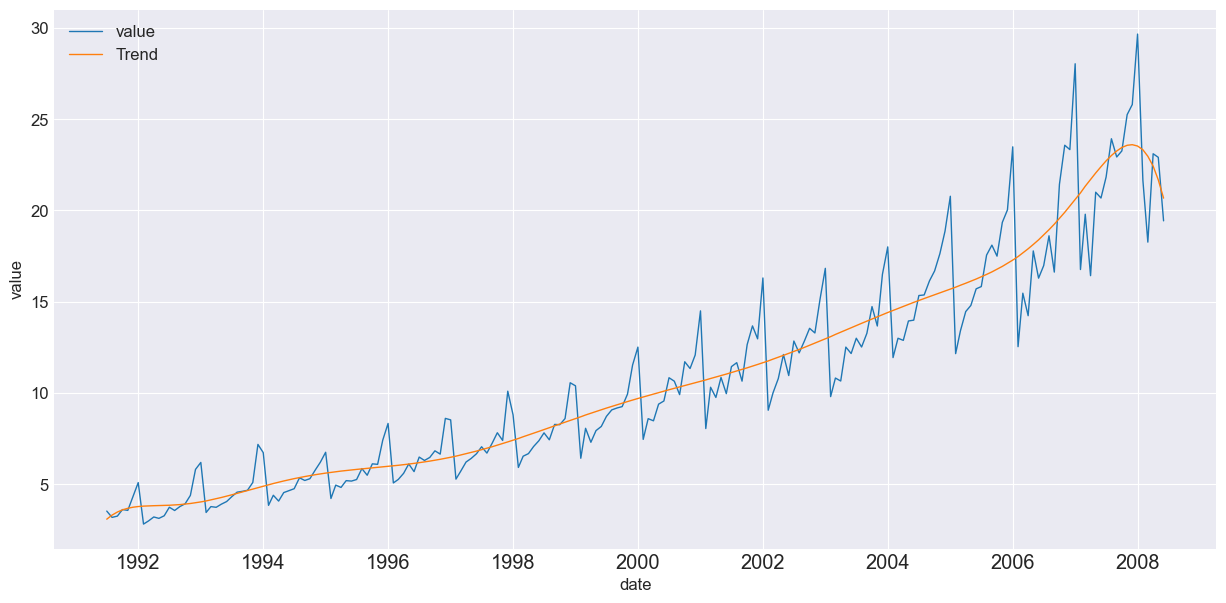

In [117]:
fig , ax = plt.subplots()

sns.lineplot(data=data_df, x = 'date', y = 'value', label = 'value', ax=ax)
sns.lineplot(data=data_df, x = 'date', y = 'Trend', label = 'Trend', ax=ax)

In [122]:
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month

data_df.head()

,date,value,Trend,year,month
0,1991-07-01,3.526591,3.083166,1991,7
1,1991-08-01,3.180891,3.307196,1991,8
2,1991-09-01,3.252221,3.474131,1991,9
3,1991-10-01,3.611003,3.595332,1991,10
4,1991-11-01,3.565869,3.680613,1991,11


Text(0.5, 0, 'Year')

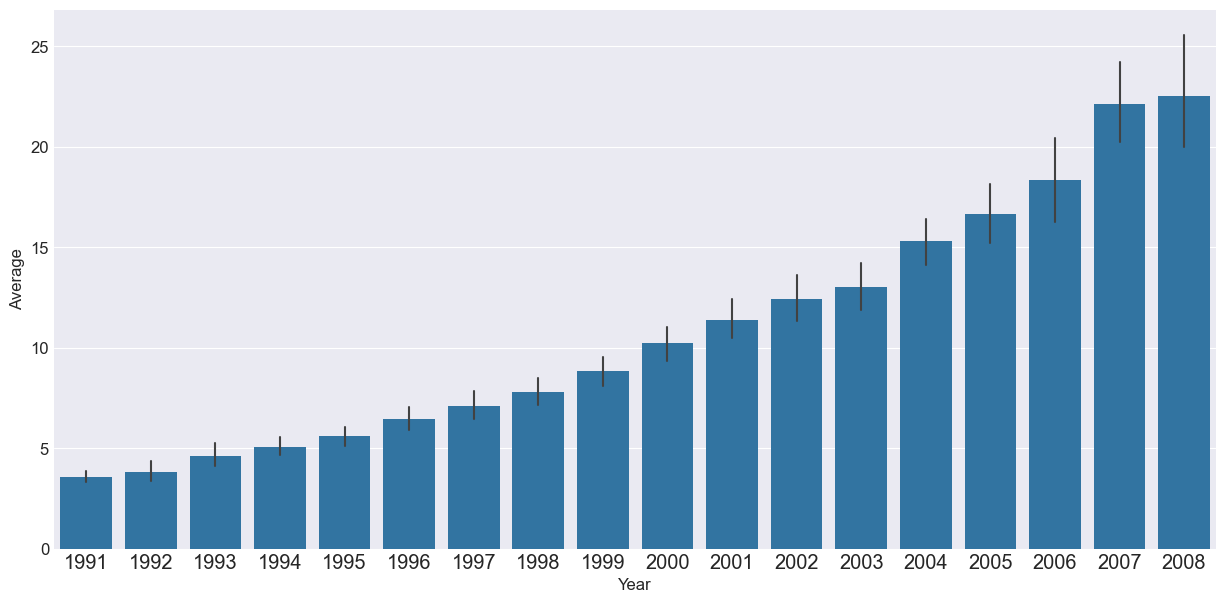

In [128]:
plt.figure()

bar = sns.barplot(data=data_df, x= 'year', y = 'value')
bar.set_ylabel('Average')
bar.set_xlabel('Year')

Text(0.5, 0, 'Month')

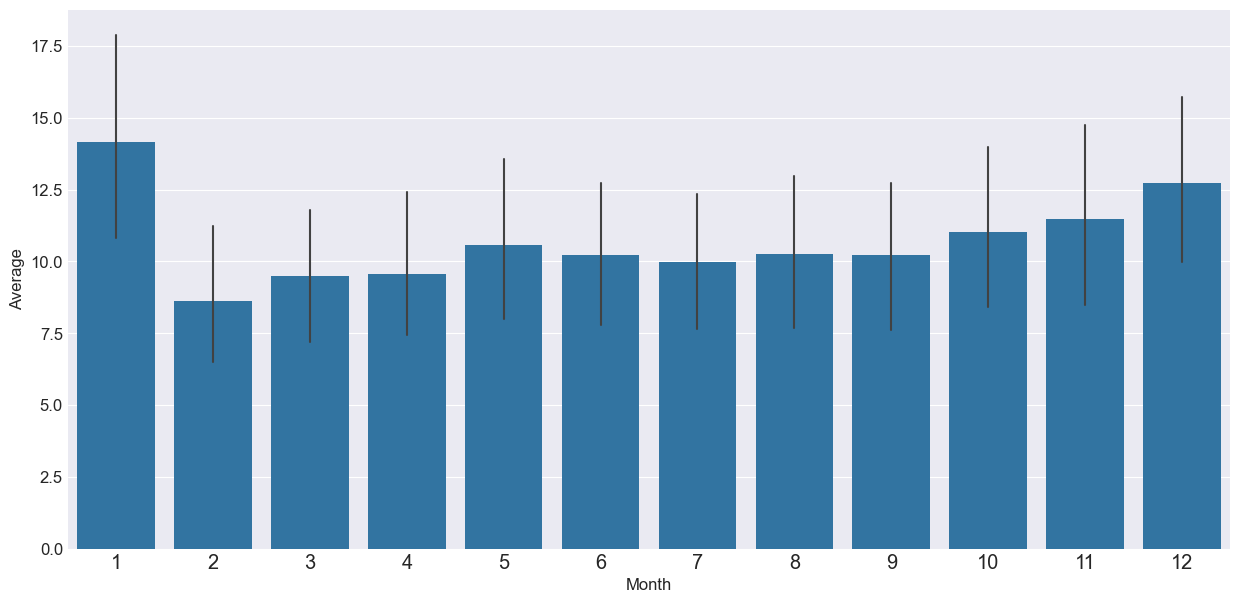

In [132]:
plt.figure()

bar = sns.barplot(data=data_df, x= 'month', y = 'value')
bar.set_ylabel('Average')
bar.set_xlabel('Month')

Text(0.5, 0, 'Month')

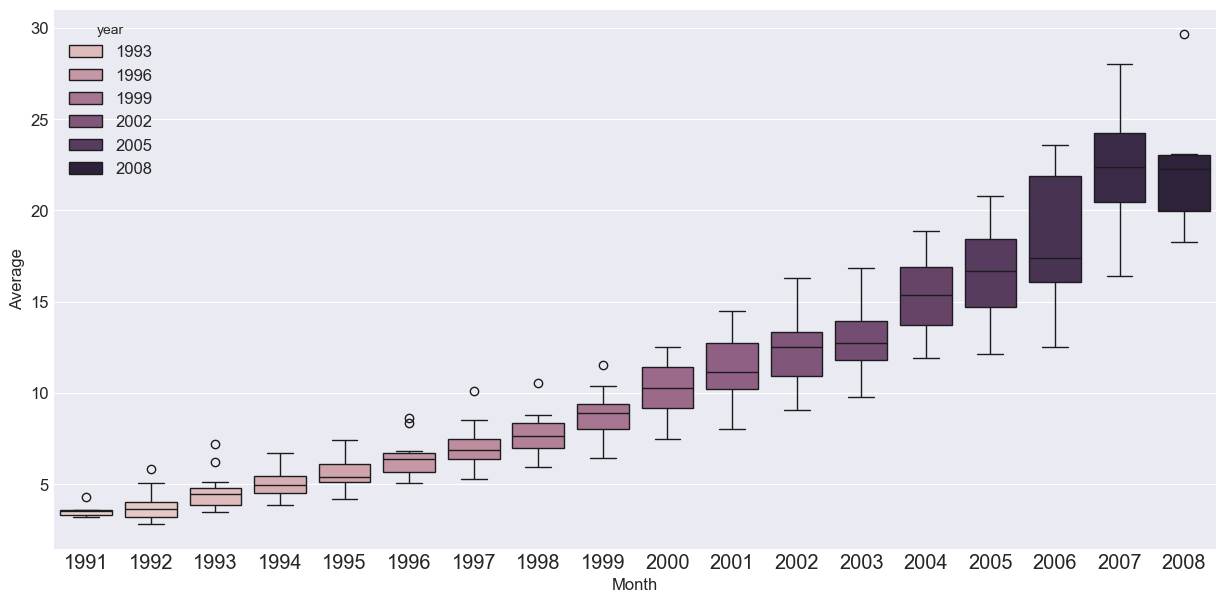

In [144]:
plt.figure()

bar = sns.boxplot(data=data_df, x= 'year', y = 'value', hue='year')
bar.set_ylabel('Average')
bar.set_xlabel('Month')

Text(0.5, 0, 'Year')

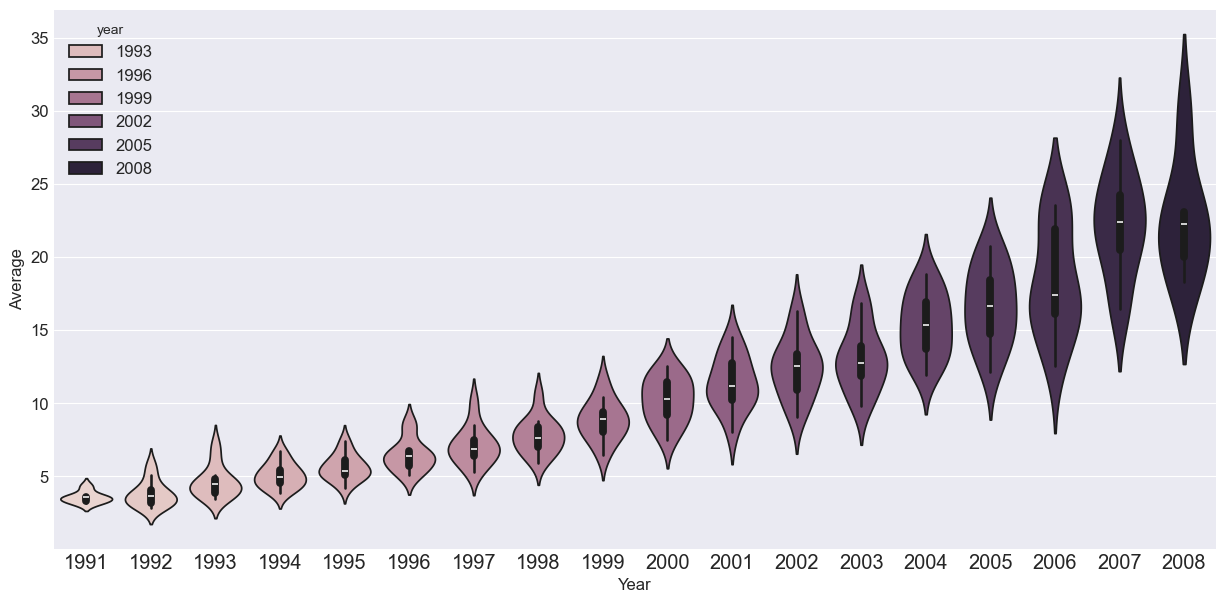

In [154]:
plt.figure()

bar = sns.violinplot(data=data_df, x= 'year', y = 'value', hue = 'year')
bar.set_ylabel('Average')
bar.set_xlabel('Year')

Text(0.5, 0, 'Month')

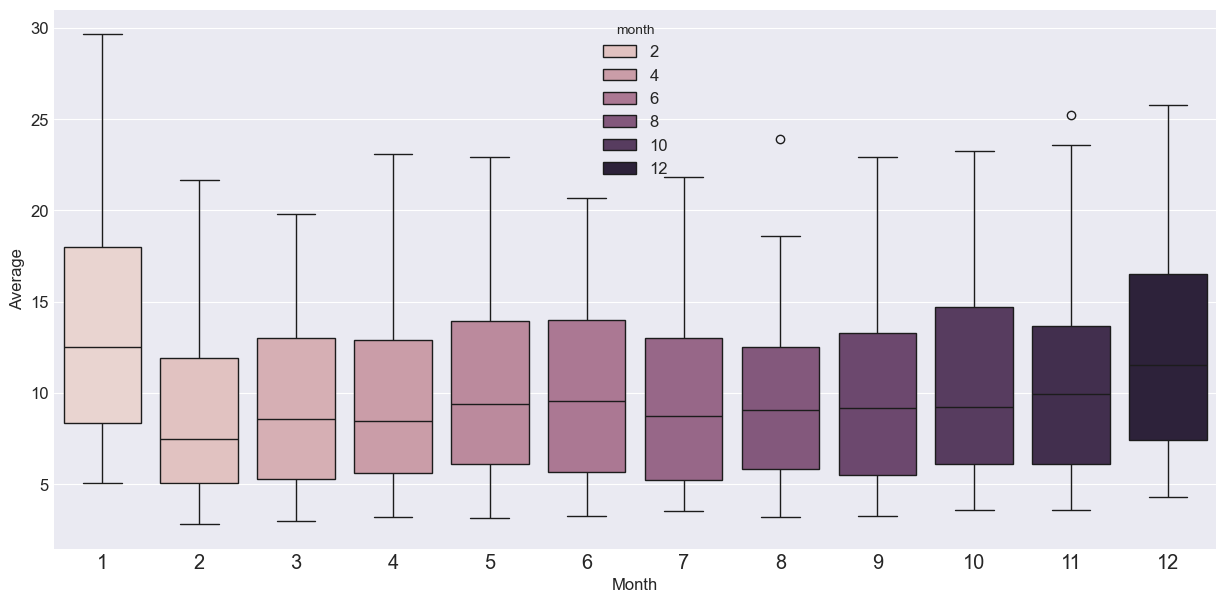

In [148]:
plt.figure()

bar = sns.boxplot(data=data_df, x= 'month', y = 'value', hue='month')
bar.set_ylabel('Average')
bar.set_xlabel('Month')

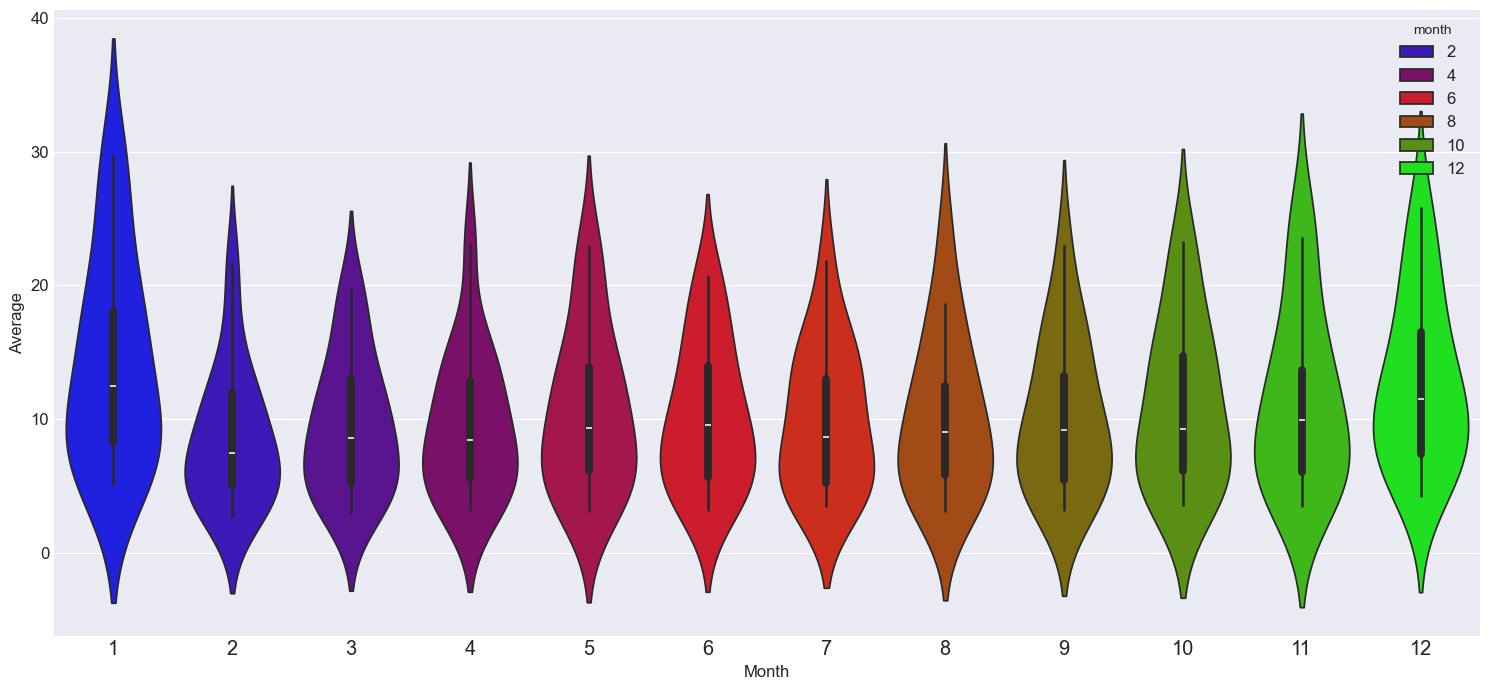

In [158]:
plt.figure()

bar = sns.violinplot(data=data_df, x= 'month', y = 'value', hue='month', palette= CMAP)
bar.set_ylabel('Average')
bar.set_xlabel('Month')

plt.tight_layout()

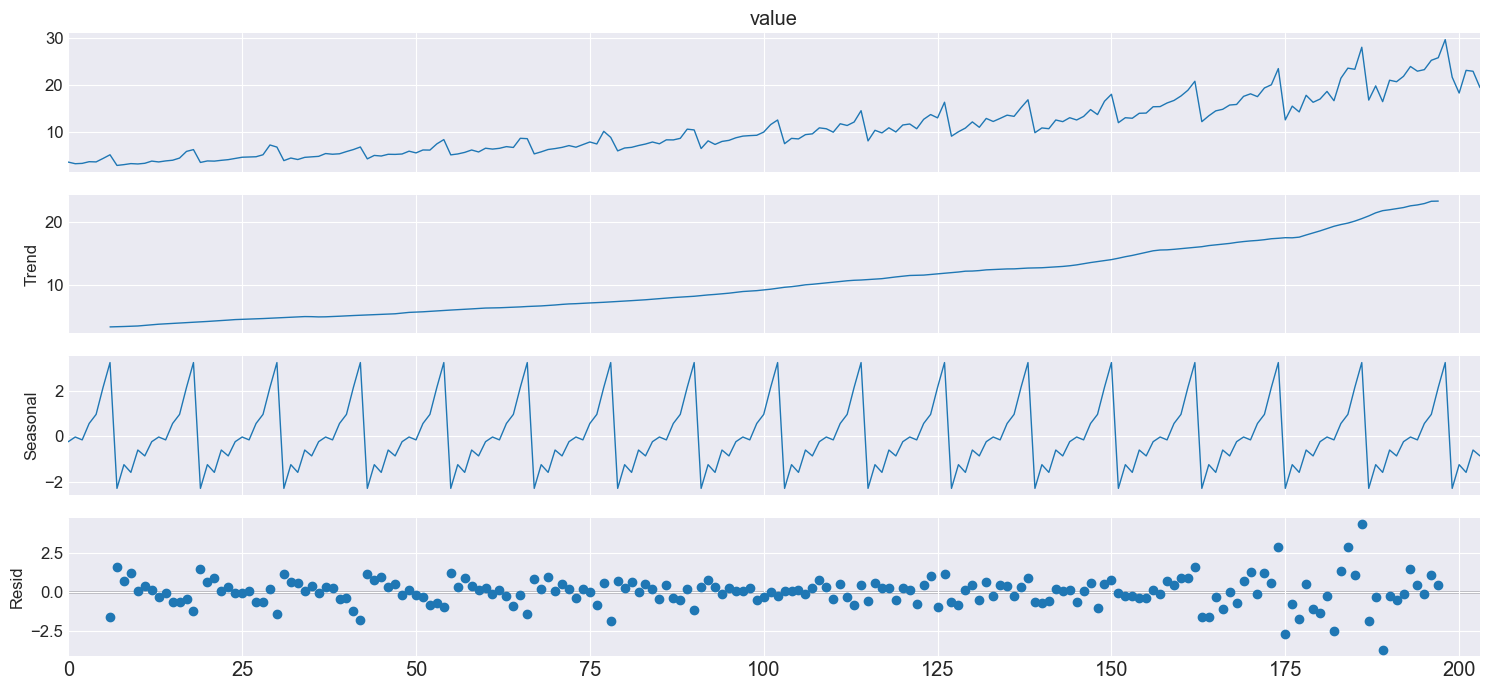

In [162]:
decomposition = sm.tsa.seasonal_decompose(data_df['value'], model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [168]:
from statsmodels.tsa.stattools import adfuller
dftest   = adfuller(data_df[['value']], autolag ='AIC')

dfoutput = pd.Series(dftest[:4], index = ['Test Statics', 'p-value', '#lag', '# of observations'])

In [170]:
for key, value in dftest[4].items():

    dfoutput[f'Critical Values {key}'] = value

dfoutput

Test Statics             3.145186
p-value                  1.000000
#lag                    15.000000
# of observations      188.000000
Critical Values 1%      -3.465620
Critical Values 5%      -2.877040
Critical Values 10%     -2.575032
dtype: float64

,value,Trend,year,month
date,,,,
1991-07-01,3.526591,3.083166,1991,7
1991-08-01,3.180891,3.307196,1991,8
1991-09-01,3.252221,3.474131,1991,9
1991-10-01,3.611003,3.595332,1991,10
1991-11-01,3.565869,3.680613,1991,11
...,...,...,...,...
2008-02-01,21.654285,23.326509,2008,2
2008-03-01,18.264945,22.968843,2008,3
2008-04-01,23.107677,22.429364,2008,4


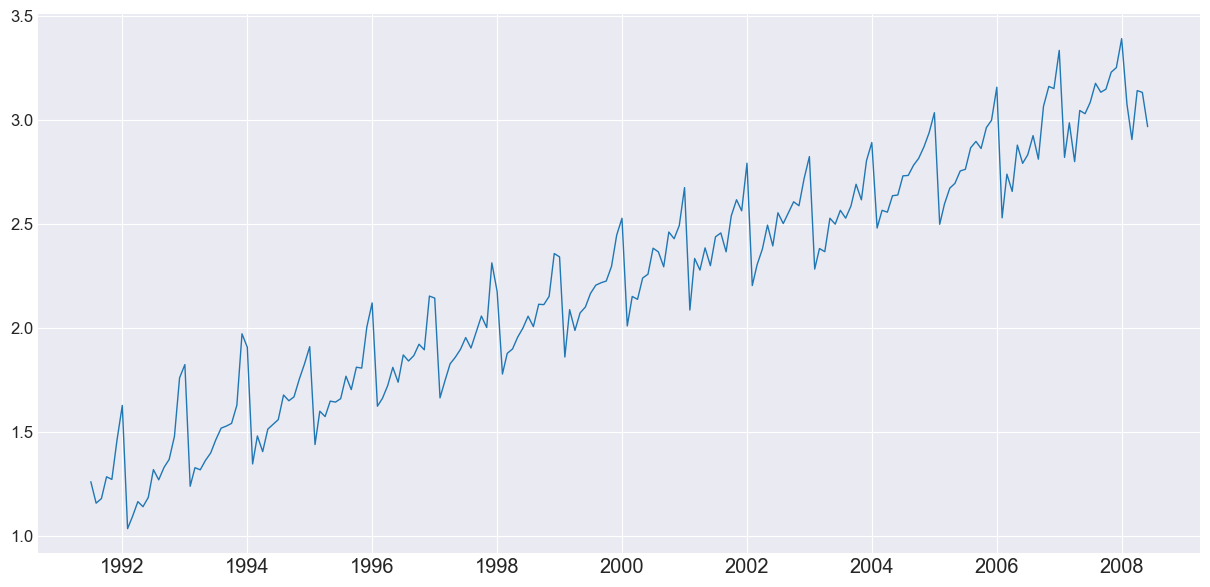

In [178]:
month_df = data_df.set_index('date')
display(month_df)
ts_log = np.log(month_df['value'])
plt.plot(ts_log)

In [180]:
dftest   = adfuller(ts_log, autolag ='AIC')

dfoutput = pd.Series(dftest[:4], index = ['Test Statics', 'p-value', '#lag', '# of observations'])

for key, value in dftest[4].items():

    dfoutput[f'Critical Values {key}'] = value

dfoutput

Test Statics            -0.988733
p-value                  0.757351
#lag                    14.000000
# of observations      189.000000
Critical Values 1%      -3.465431
Critical Values 5%      -2.876957
Critical Values 10%     -2.574988
dtype: float64

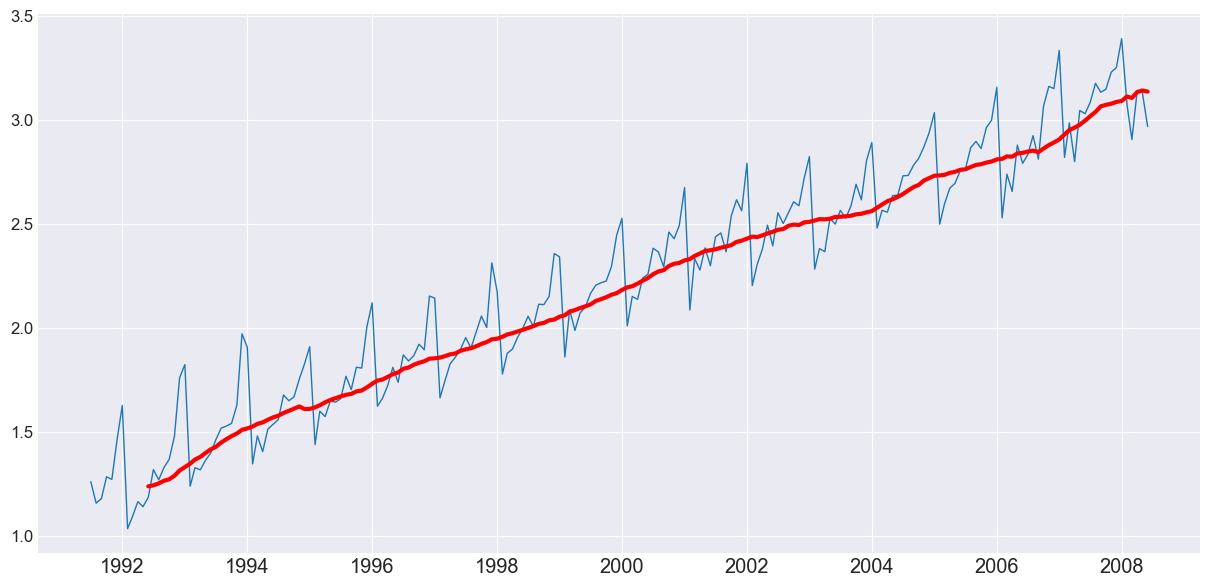

In [182]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'r', lw = 3)

In [190]:
ts_log_av = ts_log-moving_avg
ts_log_av.dropna(inplace = True)

dftest   = adfuller(ts_log_av, autolag ='AIC')

dfoutput = pd.Series(dftest[:4], index = ['Test Statics', 'p-value', '#lag', '# of observations'])

for key, value in dftest[4].items():

    dfoutput[f'Critical Values {key}'] = value

dfoutput


Test Statics            -4.026471
p-value                  0.001278
#lag                    14.000000
# of observations      178.000000
Critical Values 1%      -3.467632
Critical Values 5%      -2.877918
Critical Values 10%     -2.575501
dtype: float64

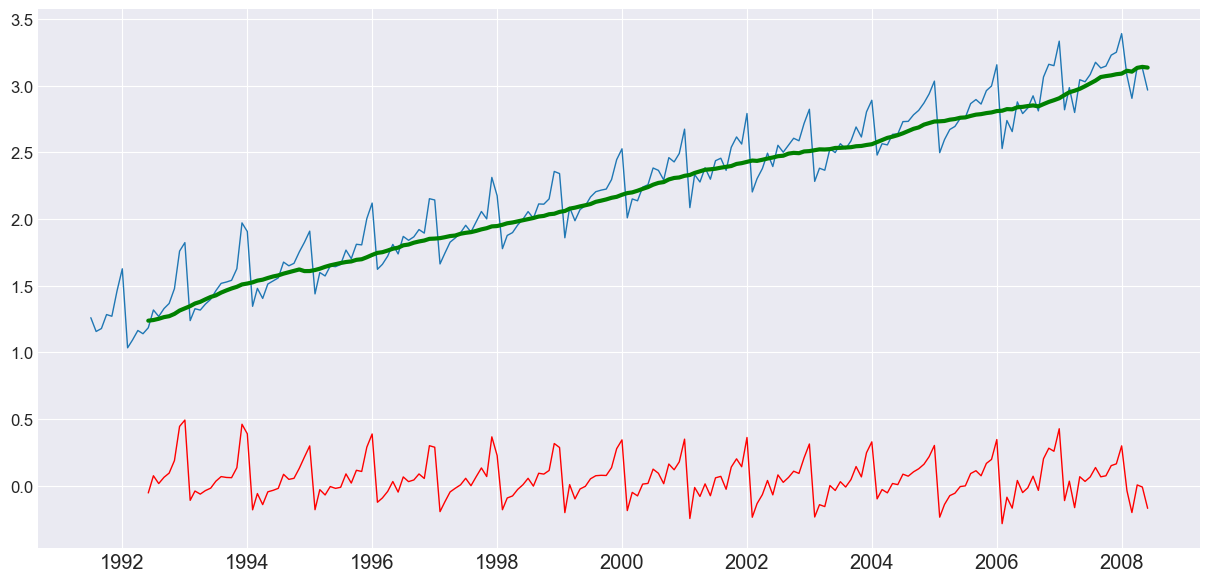

In [192]:
plt.plot(ts_log)
plt.plot(moving_avg, color = 'g', lw = 3)
plt.plot(ts_log_av, color = 'r')

In [ ]:
d